# Lecture 23
- Clustering

In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline
plt.style.use('bmh')

def plotvec(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

# Last Class

### Lecture 21
- Linear Regression
- Coefficient of Determination $R^2$

<div class="alert alert-info">
  <strong>Coefficient of Determination</strong>
    
The **coefficient of determination**, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

$$r^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}}$$

and $ 0 \leq r^2 \leq 1$.

* $r^2$ is the square of the correlation coefficient $r$.
    
</div>

### Norms, Angles, Distances

Take a look at supplementary notebook and video Lecture21-supp

<div class="alert alert-info">
  <strong>Euclidean Norm</strong>

The **Euclidean norm** of an $n$-vector $\mathbf{x}$, denoted $\Vert \mathbf{x}\Vert$, is the square-root of the inner product of the vector with itself, i.e. 

\begin{align*}
\Vert\mathbf{x}\Vert = \sqrt{\mathbf{x}^T\mathbf{x}} = \sqrt{x_1^2+x_2^2+\cdots+x_n^2}=\left(x_1^2+x_2^2+\cdots+x_n^2\right)^{1/2}
\end{align*}
</div>

<div class="alert alert-info">
  <strong>Euclidean Distance</strong>

We already know how to compute **Euclidean distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$, in an Euclidean geometry:

$$d(\mathbf{x},\mathbf{y}) = \Vert\mathbf{x}-\mathbf{y}\Vert$$

The Euclidean distance corresponds to the shortest line that connects the two vectors $\mathbf{x}$ and $\mathbf{y}$.
</div>

### Lecture 22

Please watch Lecture 22 videos - in the Lecture repo.

<div class="alert alert-info">
    <b>Vector Projection</b>

The **vector projection** of $\mathbf{y}$ onto $\mathbf{x}$ is defined as

\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= (\mathbf{y}^T\tilde{\mathbf{x}})\tilde{\mathbf{x}}
\end{align*}
    
where $\tilde{\mathbf{x}} = \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert}$. We can then write,
    
\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert} \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert} = \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert^2} \mathbf{x}
\end{align*}
    
</div>

Note that any vector in $\mathbb{R}^2$ can be represented using new axes. 

<div class="alert alert-info">
    <b>Span</b>
    
We say that $\mathcal{S}=\{\mathbf{x}', \mathbf{y}'\}$ is a **spanning set** for $\mathbb{R}^2$ (or say that $\mathcal{S}$ **spans**  $\mathbb{R}^2$).
</div>

A minimum of 2 spanning vectors are required to represent everything in $\mathbb{R}^2$. (We say that the **dimension** of $\mathbb{R}^2$ is 2.)

Since the cardinality of $\mathcal{S}$ is $\left| \mathcal{S} \right|=2$, $\mathcal{S}$ is **minimal**.

We say that $\mathcal{S}$ is a **minimal spanning set** or a **basis** for $\mathbb{R}^2$.

<div class="alert alert-info">
    <b>Basis Set</b>
    
If $\mathcal{S}$ is a **minimal spanning set**, if the vectors $\mathcal{S}$ are orthonormal, we say that $\mathcal{S}$ is an orthonormal basis for $\mathbf{R}^D$, where $D=|\mathcal{S}|$.
</div>

<div class="alert alert-info">
    <b>Linearly Independent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly independent** if they are not linearly dependent. In other words, the equation 

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =0 $$

only holds if $\beta_0 =\beta_1= \cdots= \beta_{k-1}=\mathbf{0}$.
</div>

___

# K-Means Clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

We can consider the task of clustering a collection of vectors into groups or clusters of vectors that are close to each other, as measured by the distance between pairs of them.

How many groups would you partition the following data into?

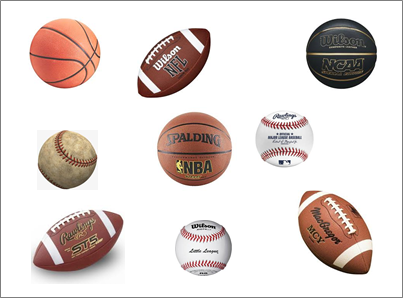

In [3]:
from IPython.display import Image
Image('figures/ClusteringExample.png', width=500)

We can describe each image in a $d$ numerical features, and so each figure (called sample) will be a $d$-vector.

And now, we want to cluster all $N$ images into sets of groups.

Clustering is an **unsupervised** learning algorithm. It's unsupervised because we do not have *ground truth* cluster labels.

## Clustering Applications

* Topic discovery
* Patient clustering
* Customer market segmentation
* Daily energy user patterns
* Image Compression
* Word clustering
* Document clustering 
* etc.

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

The ```scikit-learn``` library has many useful methods for machine learning, including clustering.

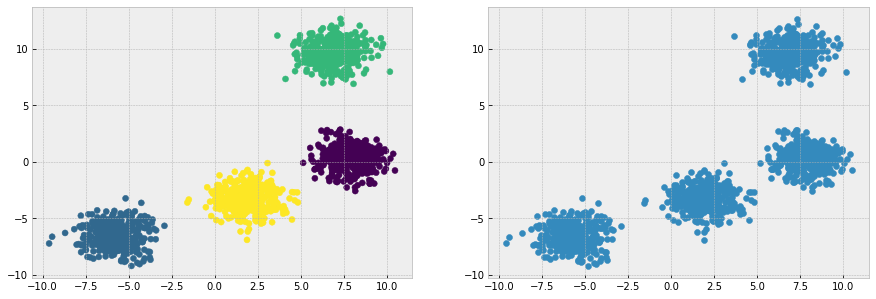

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1500, centers = 4)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1) # number of rows, # number of columns, index of subplot
plt.scatter(X[:,0],X[:,1], c=y);
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1]);

There are many ways to perform clustering. For the data set above, for example, we may pose the problem as: the data distribution is a sum of Gaussian distributions - called a *Gaussian Mixture Model*.

With this assumption, we can then develop *optimization* strategies to model our measure for similarity between groups.

## $k$-Means Clustering Algorithm

$k$-Means Clustering is a centroid-based clustering and, instead of a probabilistic model, it uses distance between vectors and centroids in order to group or cluster vectors together.

$k$-Means can be modified to use any distance metric. In here, we will introduce/review it with Euclidean distance.

The value $k$ refers to the number of clusters the user wants to partition the data into. So $k$ is a parameter of the algorithm.

The **first step** of the algorithm is to initialize the $k$ cluster centroids, $\mathbf{c_k}$. The goal is then to assign membership to each vector $\mathbf{x_i}$, $i=1,2,\dots, N$, as belonging to one of $k$ clusters.

We can design a cost function:

\begin{align*}
J &= \sum_{i=1}^N\sum_{k=1}^K u_{ik} d\left(\mathbf{x_i},\mathbf{c_k}\right)^2\\
&= \sum_{i=1}^N\sum_{k=1}^K u_{ik} \left\Vert\mathbf{x_i}-\mathbf{c_k}\right\Vert^2
\end{align*}

where $u_{ik}$ is a membership weight for vector $\mathbf{x_i}$ in cluster centroid $\mathbf{c_k}$, and so, $u_{ik}\in\{0,1\}$ and $\sum_{k=1}^K u_{ik}=1$.

The steps to implement $k$-Means algorithm are:

1. Initialize $k$ cluster centroids
2. Compute distance of every sample to each cluster centroid. For every sample, assign membership corresponding to cluster with smallest distance. 
3. Update cluster centroid as the mean of all the data samples assigned to it
4. Go back to step 2 and continue until some convergence criteria is met

The pseudo-code can be defined as:

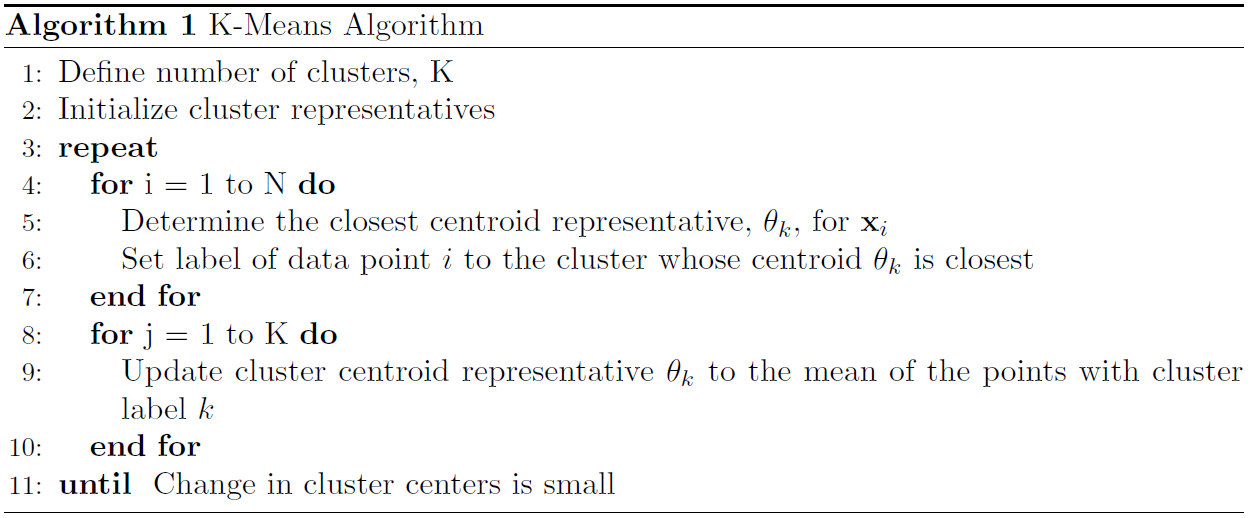

In [10]:
Image('figures/KMeans.png',width=800)

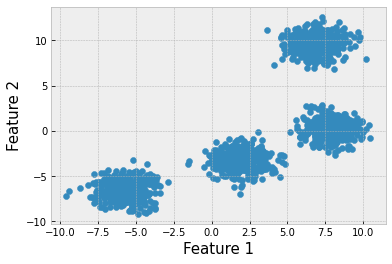

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 1',size=15)
plt.ylabel('Feature 2', size=15);

## Scaling the Data

* **Z-score Standardization**

\begin{align*}
\hat{f}_i = \frac{f_i-\mu_{f_i}}{\sigma_{f_i}}
\end{align*}

* **Min-Max Scaling**

\begin{align*}
\hat{f}_i = \frac{f_i-\min(f_i)}{\max(f_i) - \min(f_i)}
\end{align*}

In [12]:
X.shape

(1500, 2)

In [13]:
np.mean(X,axis=0), np.std(X,ddof=1, axis=0)

(array([2.73944379e+00, 1.38897338e-03]), array([5.48774265, 6.12713075]))

In [14]:
Xst = (X-np.mean(X,axis=0))/np.std(X, ddof=1, axis=0) # z-score
Xmm = (X-np.min(X, axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)) # min-max

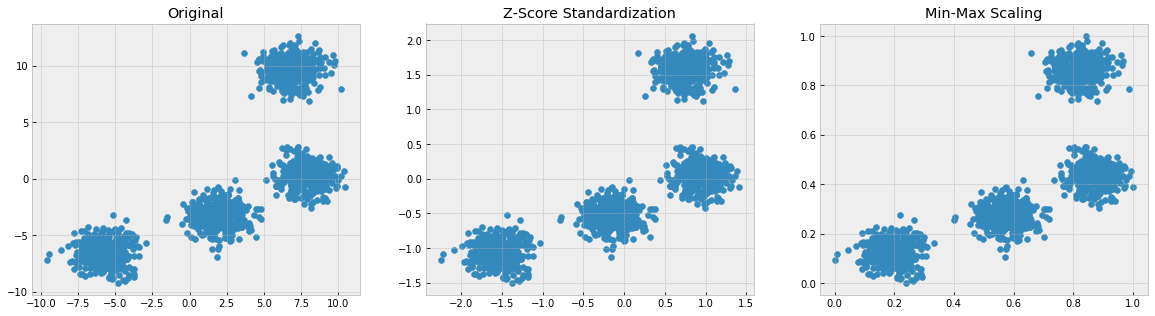

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.scatter(X[:,0],X[:,1]); plt.title('Original')
plt.subplot(1,3,2); plt.scatter(Xst[:,0],Xst[:,1]); plt.title('Z-Score Standardization')
plt.subplot(1,3,3); plt.scatter(Xmm[:,0],Xmm[:,1]); plt.title('Min-Max Scaling');

Let $k=4$. Initialize the cluster centroids:

In [28]:
# Step 1: Initialize using random numbers sampled from a Gaussian(0,1)


centroids = stats.norm.rvs(size=(4,2)) # Option 1

# centroids = stats.uniform.rvs(size=(4,2)) # Option 2
centroids

array([[ 0.75782149,  1.38266894],
       [-0.86196586, -0.58355465],
       [ 0.35058335, -0.77532323],
       [ 1.49009216,  0.92889857]])

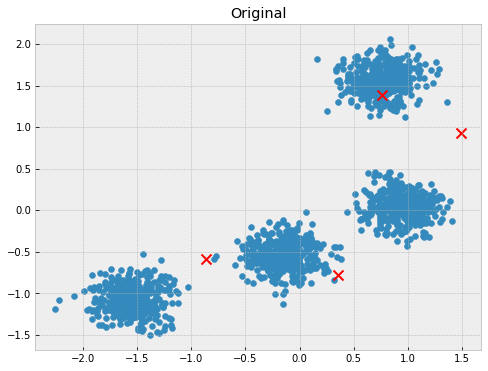

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(Xst[:,0],Xst[:,1]); plt.title('Original')
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='x', c = 'r');

Compute the Euclidean distance of every point to every cluster centroid:

In [31]:
from scipy.spatial.distance import cdist

Edist = cdist(Xst, centroids, metric = 'euclidean')

Edist.shape

(1500, 4)

Row $i$ contains 4 columns. Column $j$ of row $i$ corresponds to the distance of the 2-vector data point $x_i$ to the cluster centroid $c_j$.

In [33]:
Edist[0,:]

array([2.44350684, 0.78849204, 0.50032735, 2.44093023])

Now, to point $x_1$ we want to assign the label that corresponds to the cluster centroid with the smallest distance:

In [34]:
np.argmin(Edist[0,:])

2

In [37]:
np.argmin(Edist, axis=1)

array([2, 1, 3, ..., 0, 2, 1])

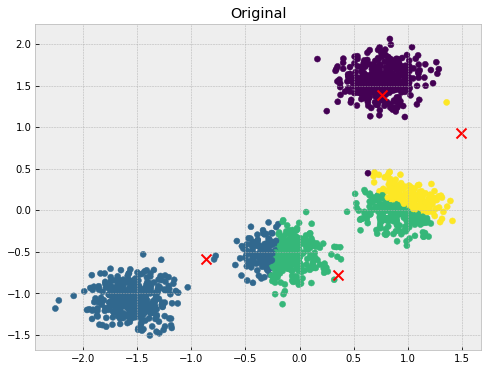

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(Xst[:,0],Xst[:,1], c=np.argmin(Edist,axis=1)); 
plt.title('Original')
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='x', c = 'r');

Now, we need to update the cluster centroids using these memberships:

In [43]:
labels = np.argmin(Edist, axis=1)

labels.shape

(1500,)

In [44]:
for i in range(4):
    print('Cluster ', i)
    print('Old Centroid: ', centroids[i,:])
    print('New Centroid: ', np.mean(Xst[labels==i,:], axis=0), '\n')

Cluster  0
Old Centroid:  [0.75782149 1.38266894]
New Centroid:  [0.75930864 1.56552829] 

Cluster  1
Old Centroid:  [-0.86196586 -0.58355465]
New Centroid:  [-1.25121594 -0.93043518] 

Cluster  2
Old Centroid:  [ 0.35058335 -0.77532323]
New Centroid:  [ 0.36905856 -0.32476834] 

Cluster  3
Old Centroid:  [1.49009216 0.92889857]
New Centroid:  [1.02128466 0.16250827] 



In [46]:
centroidsOld = centroids
centroids = np.array([np.mean(Xst[labels==i,:], axis=0) for i in range(4)])

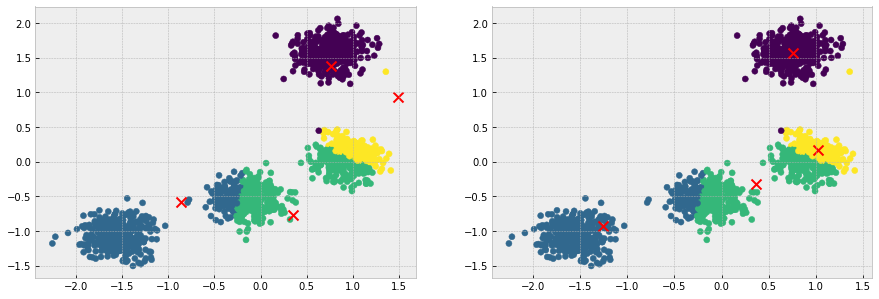

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(Xst[:,0], Xst[:,1], c=labels)
plt.scatter(centroidsOld[:,0], centroidsOld[:,1], s=100, marker='x', c='r');
    

plt.subplot(1,2,2)
plt.scatter(Xst[:,0], Xst[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='x', c='r');

In [51]:
#Convergence?
np.linalg.norm(centroidsOld-centroids)

1.147064542695216

We will continue this process until convergence...

Let's use ```scikit-learn``` instead to train this clustering algorithm.

### Using ```scikit-learn```

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [53]:
Xst = StandardScaler().fit_transform(X) # Z-score

Xmm = MinMaxScaler().fit_transform(X) # min max standardization

Xst.shape, Xmm.shape

((1500, 2), (1500, 2))

In [83]:
from sklearn.cluster import KMeans

k = 4 # number of clusters

kmeans = KMeans(k)
kmeans.fit(Xst) # TRAINING - apply kmeans on the standardized data
prediction = kmeans.predict(Xst) # EVALUATING

In [84]:
prediction.shape

(1500,)

In [85]:
np.unique(prediction, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([375, 375, 375, 375]))

In [86]:
kmeans.cluster_centers_

array([[ 0.93741909,  0.03538919],
       [-1.54269986, -1.06850823],
       [ 0.76149798,  1.56832133],
       [-0.1562172 , -0.53520228]])

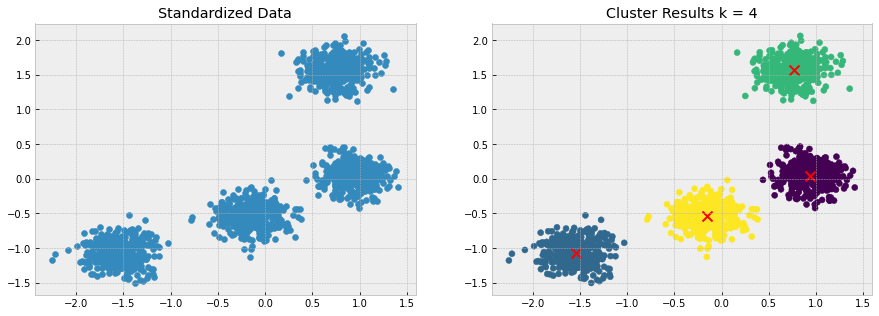

In [87]:
# another way of creating subplots
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(Xst[:,0], Xst[:,1])
plt.title('Standardized Data')

fig.add_subplot(1,2,2)
plt.scatter(Xst[:,0], Xst[:,1], c=prediction)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=100, marker = 'x', c='r')
plt.title('Cluster Results k = '+str(k));


## Issues with $k$-Means

* Final solution will depend on the initialization
* Does not perform well in data with non-linear structure
* Sensitive to data scaling - need to standardize or normalize the data
* Using Euclidean distance, the cluster will be circular/spherical only
* Tend to misrepresent small sample groups
* May not deal well with unequal data points in the clusters

___

## Clustering Validity Criteria

Cluster validity measures can often be paired with domain-knowledge. When we do not know anything about the data, we can use automatic measures to assess the *goodness* of the clustering results.

There are several metrics we can use to validate our clustering results. They can be categorized in three types of criteria:

1. **Internal Criteria:** evaluates the results of a clustering algorithm in terms of quantities that involve the vectors of the data set themselves. The optimal clustering scheme under the internal criteria index includes: **compactness** between samples assigned to the same cluster and **separation** between samples assigned to different clusters

    * Example: **Silhouette index**, range of values is $[-1,1]$ where a silhouette index closer to 1 has better separation and compactness.

2. **External Criteria:**  used to measure how well a clustering result matches a set of *given* labels. External cluster validity indices can be used to: (1) compare the clustering results with the *ground truth* (true labels); (2) compare clustering results between different clustering algorithms to measure how different they are and how stable a particular clustering is on a data set across parameter settings and/or algorithms.

    * Example: **Rand index**, range of values is $[0,1]$ where a rand index closer to 1 corresponds to a better match with the ground truth labels.

3. **Relative Criteria:** measures the results of a clustering structure by comparing it to other clustering schemes, resulting by the same algorithm but with different parameter values. In practice, relative criteria are a combination on internal and external criteria.

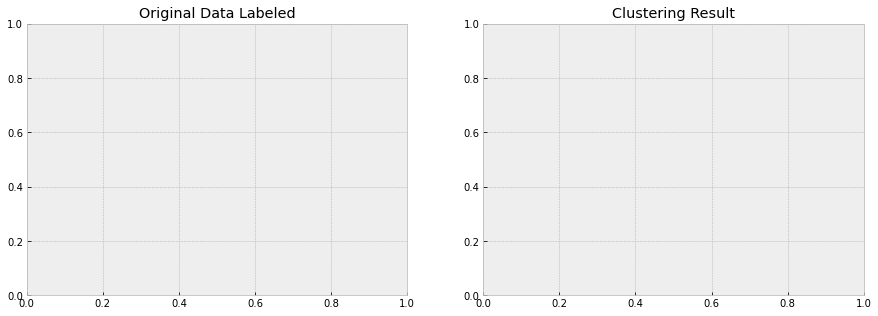

In [88]:
# Try for K=3


plt.figure(figsize=(15,5))
plt.subplot(1,2,1); 
#
plt.title('Original Data Labeled')


plt.subplot(1,2,2); 
#
plt.title('Clustering Result');

In [89]:
from sklearn.metrics import silhouette_score

print('Silhouette Index: ', silhouette_score(Xst, prediction)) # K=4

Silhouette Index:  0.7658702891977273


## Example: K-Means for Color Compression

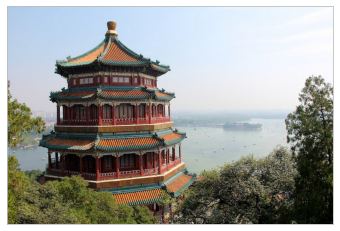

In [90]:
from sklearn.datasets import load_sample_image

image = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [91]:
image.shape

(427, 640, 3)

In [92]:
image[0,0,:]

array([174, 201, 231], dtype=uint8)

In [93]:
data = image/255.0 # min-max scaling to be between [0,1]

data = data.reshape(427*640, 3)

data.shape


(273280, 3)

In [94]:
def plot_pixels(data, title, colors=None, N=10000):
    '''Function to plot pixels in color space, using a subset of 10,000 pixels for efficiency'''
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);


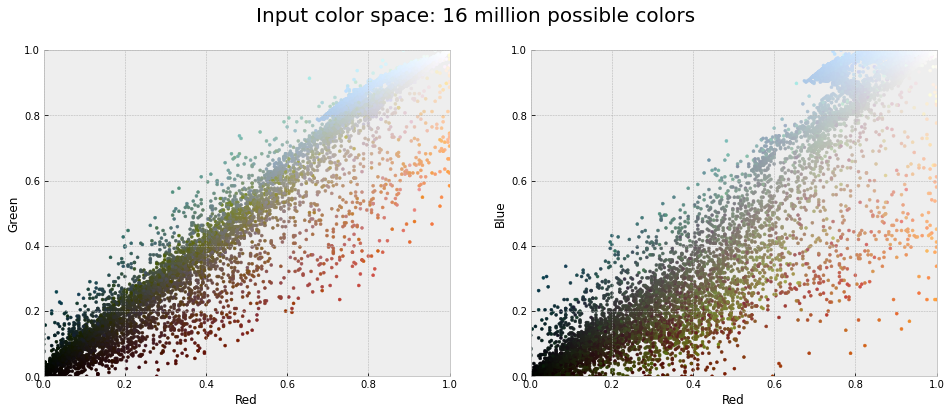

In [95]:
plot_pixels(data, title='Input color space: 16 million possible colors')

How many possible colors?

In [96]:
(2**8)**3

16777216

Now let's reduce these (approximately) 16 million colors to just 16 colors, using a k-means clustering across the pixel space.

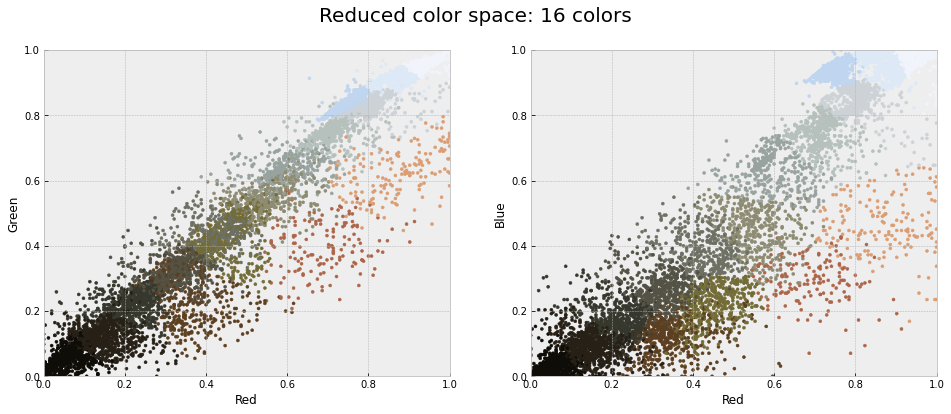

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(16) # K=16
kmeans.fit(data) # TRAIN
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, 
            title="Reduced color space: 16 colors")


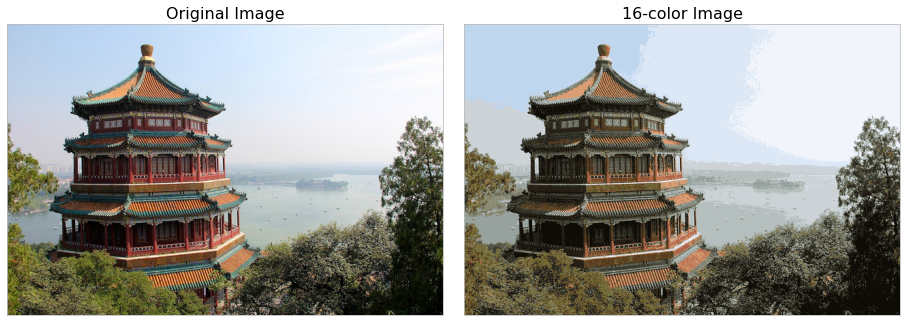

In [98]:
recolored_image = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored_image)
ax[1].set_title('16-color Image', size=16);